In [11]:
import anndata
import scanpy as sc

In [13]:
kang_norm = anndata.read_h5ad('C:/Users/Katerchen/Documents/Code/master_thesis/kang_normalized_hvg.h5ad')

In [4]:
kang_norm = anndata.read_h5ad('C:/Users/Katerchen/Documents/Code/master_thesis/kang_normalized_hvg.h5ad')
Norman_prep = anndata.read_h5ad('C:/Users/Katerchen/Documents/Code/master_thesis/Norman2019_prep_new.h5ad')
combo_sciplex = anndata.read_h5ad('C:/Users/Katerchen/Documents/Code/master_thesis/combo_sciplex_prep_hvg_filtered.h5ad')
GSM_new = anndata.read_h5ad('C:/Users/Katerchen/Documents/Code/master_thesis/GSM_new.h5ad')

<Axes: title={'center': 'kang_norm'}, xlabel='cell_type'>

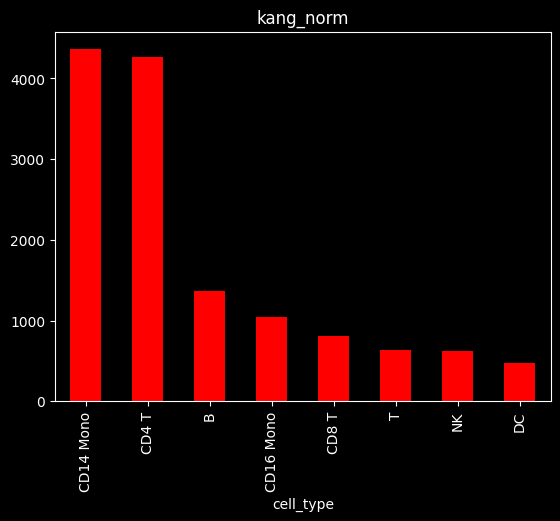

In [5]:
# plot the number of cells in each cell type for each dataset 

# kang_norm
kang_norm.obs['cell_type'].value_counts().plot(kind='bar', title='kang_norm', color='red')

<Axes: title={'center': 'GSM_new'}, xlabel='cell_type'>

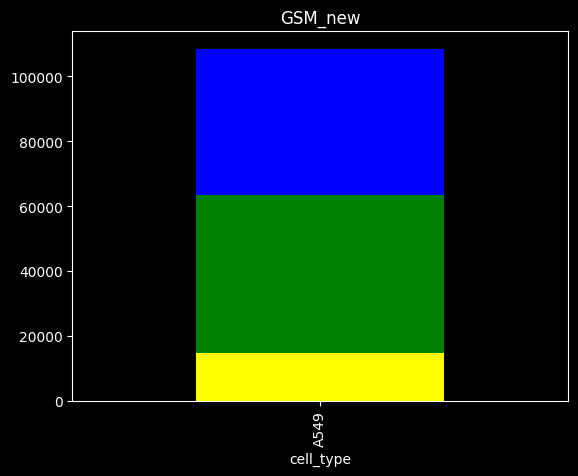

In [6]:
# Norman_prep
Norman_prep.obs['cell_type'].value_counts().plot(kind='bar', title='Norman_prep', color='blue')

# combo_sciplex
combo_sciplex.obs['cell_type'].value_counts().plot(kind='bar', title='combo_sciplex', color='green')

# GSM_new
GSM_new.obs['cell_type'].value_counts().plot(kind='bar', title='GSM_new', color='yellow')

In [7]:
# get the amount of cells in each dataset
print("Kang-Norm-Cells: ", kang_norm.shape[0])
print("Norman-Cells: ", Norman_prep.shape[0])
print("Combo-Cells: ", combo_sciplex.shape[0])
print("GSM-Cells: ", GSM_new.shape[0])

# get the amount of genes in each dataset
print("Kang-Norm-Genes: ", kang_norm.shape[1])
print("Norman-Genes: ", Norman_prep.shape[1])
print("Combo-Genes: ", combo_sciplex.shape[1])
print("GSM-Genes: ", GSM_new.shape[1])

# get the amount of cell types in each dataset
print("Kang-Norm-Cell-Types: ", kang_norm.obs['cell_type'].value_counts().shape[0])
print("Norman-Cell-Types: ", Norman_prep.obs['cell_type'].value_counts().shape[0])
print("Combo-Cell-Types: ", combo_sciplex.obs['cell_type'].value_counts().shape[0])
print("GSM-Cell-Types: ", GSM_new.obs['cell_type'].value_counts().shape[0])

Kang-Norm-Cells:  13576
Norman-Cells:  108497
Combo-Cells:  63378
GSM-Cells:  14811
Kang-Norm-Genes:  5000
Norman-Genes:  5000
Combo-Genes:  5000
GSM-Genes:  4999
Kang-Norm-Cell-Types:  8
Norman-Cell-Types:  1
Combo-Cell-Types:  1
GSM-Cell-Types:  1


In [8]:
kang_norm.X
print(kang_norm.obs)


                   orig.ident  nCount_RNA  nFeature_RNA  stim  \
index                                                           
AAACATACATTTCC.1  IMMUNE_CTRL        3017           877  CTRL   
AAACATACCAGAAA.1  IMMUNE_CTRL        2481           713  CTRL   
AAACATACCTCGCT.1  IMMUNE_CTRL        3420           850  CTRL   
AAACATACGATGAA.1  IMMUNE_CTRL        1868           634  CTRL   
AAACATACGGCATT.1  IMMUNE_CTRL        1581           557  CTRL   
...                       ...         ...           ...   ...   
TTTGCATGAACGAA.1  IMMUNE_STIM        5577          1237  STIM   
TTTGCATGACGTAC.1  IMMUNE_STIM        1364           536  STIM   
TTTGCATGCCTGTC.1  IMMUNE_STIM        2114           817  STIM   
TTTGCATGCTAAGC.1  IMMUNE_STIM        1522           523  STIM   
TTTGCATGGGACGA.1  IMMUNE_STIM        1143           503  STIM   

                 seurat_annotations  integrated_snn_res.0.5  seurat_clusters  \
index                                                                     

In [9]:
print(kang_norm.var)

            highly_variable     means  dispersions  dispersions_norm  \
index                                                                  
AL627309.1             True  0.002119     2.298563          0.404038   
LINC00115              True  0.032814     2.472599          1.177755   
KLHL17                 True  0.011065     2.262076          0.241823   
HES4                   True  1.050436     2.965142          1.142492   
ISG15                  True  5.208616     6.329169          1.000000   
...                     ...       ...          ...               ...   
SERHL2                 True  0.002982     2.344063          0.606318   
AF127936.7             True  0.001551     2.261518          0.239343   
AP000476.1             True  0.004405     2.256187          0.215643   
AF131217.1             True  0.006196     2.579342          1.652307   
AP001062.7             True  0.001474     2.304125          0.428765   

                symbol  
index                   
AL627309.1  A

In [12]:
sc.pp.pca(kang_norm)

c:\Users\Katerchen\.conda\envs\myenv\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [13]:
sc.pp.neighbors(kang_norm)
# sc.tl.leiden(kang_norm)

c:\Users\Katerchen\.conda\envs\myenv\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Katerchen\.conda\envs\myenv\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Katerchen\.conda\envs\myenv\Lib\site-packages\umap\distances.py:1086: NumbaDepr

c:\Users\Katerchen\.conda\envs\myenv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
c:\Users\Katerchen\.conda\envs\myenv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\Katerchen\.conda\envs\myenv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


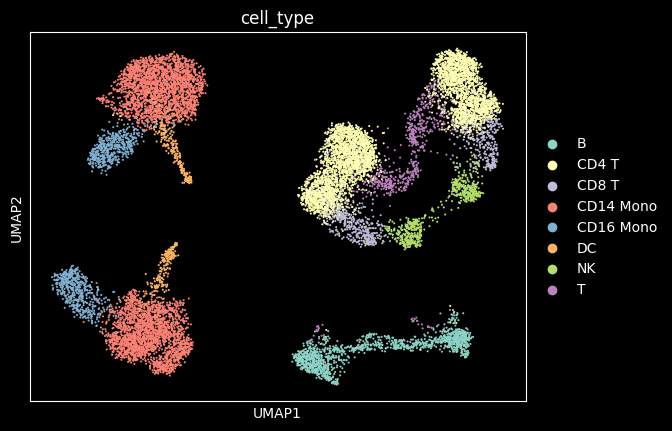

In [15]:
sc.tl.umap(kang_norm)
# sc.pl.umap(kang_norm, color=['leiden'])

# plot umap with cell types
sc.pl.umap(kang_norm, color=['cell_type'])

c:\Users\Katerchen\.conda\envs\myenv\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
c:\Users\Katerchen\.conda\envs\myenv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
c:\Users\Katerchen\.conda\envs\myenv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\Katerchen\.conda\envs\myenv\Lib\site-packages\scanpy\

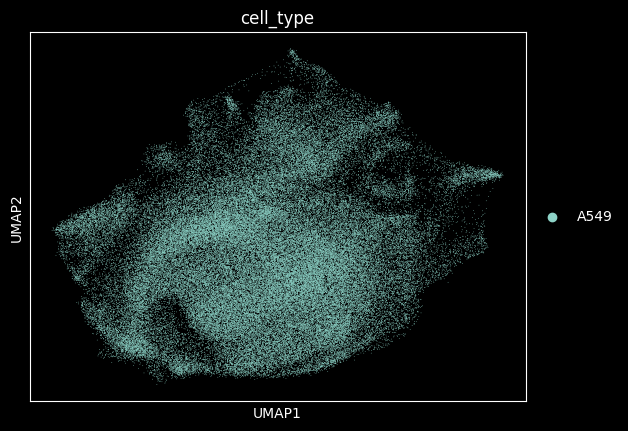

In [16]:
# umap plot of norman
sc.pp.pca(Norman_prep)
sc.pp.neighbors(Norman_prep)
sc.tl.umap(Norman_prep)
sc.pl.umap(Norman_prep, color=['cell_type'])

c:\Users\Katerchen\.conda\envs\myenv\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
c:\Users\Katerchen\.conda\envs\myenv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
c:\Users\Katerchen\.conda\envs\myenv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\Katerchen\.conda\envs\myenv\Lib\site-packages\scanpy\

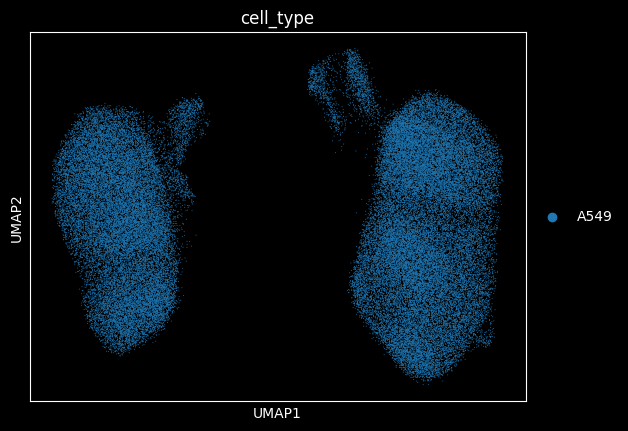

In [17]:
# umap plot of combo
sc.pp.pca(combo_sciplex)
sc.pp.neighbors(combo_sciplex)
sc.tl.umap(combo_sciplex)
sc.pl.umap(combo_sciplex, color=['cell_type'])